In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1.ushape.csv')
df.shape

(100, 3)

In [3]:
df.head()

,x,y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


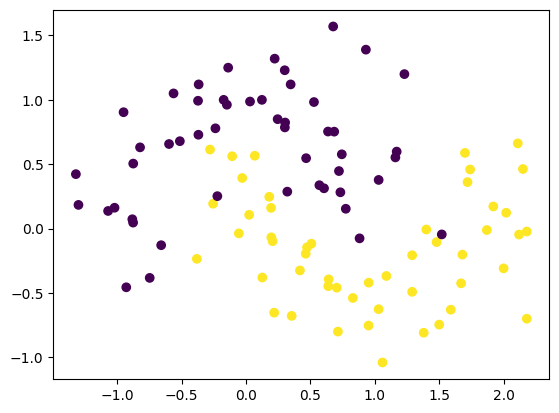

In [4]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# model building

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

kernal_initializer = ['he_normal' , 'he_uniform' , 'glorot_normal','glorot_uniform']

In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.26644355,  1.0186021 ,  1.038705  ,  0.79528207,  1.7213656 ,
         -1.1483977 , -0.57124317, -1.5121111 , -0.63754517, -0.9112106 ],
        [ 0.8813613 , -0.7699522 , -0.23449686, -1.0121334 , -1.1386153 ,
         -0.05512203, -0.22018671, -0.69547296,  0.94140625, -0.06393613]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.22790961, -0.77540094, -0.10143311, -0.48248106,  0.64546585,
         -0.5542398 ,  0.00382793, -0.0484523 , -0.15468362,  0.44908655],
        [-0.26800886, -0.4230604 , -0.5552095 ,  0.12553605, -0.3675725 ,
          0.94751316,  0.50653726, -0.385426  ,  0.14519252, -0.2770176 ],
        [ 0.16164061, -0.09183408, -0.08041423,  0.7818691 ,  0.05727607,
          0.7474386 , -0.49665883,  0.28805828, -0.4115456 , -0.6372977 ],
        [ 0.23650943,  0.39356464, -0.7974862 ,  0.8567388 ,  0.08937206,
          0.22787285,  0.48949262, -0.6766231 , -0.47396633,  0.04208907],
        [-0.13078

###  setting weight for he normal init formula
$$
\sqrt{\frac{1}{\text{fan_in}}}
$$


In [11]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.6523343 ,  0.24767327,  0.01079283,  0.68447375, -0.22928824,
          0.3806621 ,  0.73724794, -0.97396743,  0.5998413 ,  0.829726  ],
        [ 1.4394914 , -0.85341007,  0.63458055,  0.0309748 , -0.97625124,
         -0.54671   , -0.40864184,  1.5124286 , -0.45551655, -0.20097373]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.00683541,  0.0166891 , -0.01501117,  0.576442  , -0.7921044 ,
         -0.04832076,  0.2736779 , -0.4639486 ,  0.20138456, -0.12210742],
        [ 0.17301314, -0.5190047 , -0.25429016, -0.11524632,  0.13610889,
         -0.27938396, -0.04490427, -0.03755068,  0.6840885 ,  0.00724174],
        [ 0.1255945 ,  0.26785952,  0.05082788,  0.21763656,  0.0615989 ,
          0.26477388,  0.3831753 ,  0.3108121 , -0.31531066, -0.51952916],
        [ 0.45971006,  0.06071572,  0.1358856 , -0.1329894 ,  0.14062645,
          0.31035906,  0.45861235,  0.08013275, -0.14921543,  0.05103128],
        [ 0.42066

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.5102 - loss: 0.6945 - val_accuracy: 0.4500 - val_loss: 0.6879
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4891 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5609 - loss: 0.6850 - val_accuracy: 0.7000 - val_loss: 0.6790
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7898 - loss: 0.6809 - val_accuracy: 0.8000 - val_loss: 0.6756
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8086 - loss: 0.6778 - val_accuracy: 0.8500 - val_loss: 0.6723
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8344 - loss: 0.6748 - val_accuracy: 0.8500 - val_loss: 0.6683
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7828 - loss: 0.6729 - val_accuracy: 0.8500 - val_loss: 0.6638
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7984 - loss: 0.6687 - val_accuracy: 0.8500 - val_loss

In [16]:
model.get_weights()

[array([[-0.49489838,  0.12203906,  0.16421737,  0.94208395, -0.34069514,
          0.4948822 ,  0.8300423 , -0.79731107,  0.7089484 ,  0.9469554 ],
        [ 1.58736   , -0.80694044,  0.7822406 , -0.09699852, -1.0676063 ,
         -0.77720034, -0.6696466 ,  1.6984799 , -0.580978  , -0.03402041]],
       dtype=float32),
 array([ 0.0923468 , -0.08905255,  0.11665604,  0.12989967,  0.2210333 ,
         0.10715908,  0.06100707,  0.10722238,  0.18010266,  0.1079094 ],
       dtype=float32),
 array([[ 0.14156933,  0.16952887,  0.24700771,  0.6162612 , -1.0216438 ,
         -0.2682304 ,  0.05365221, -0.66890377,  0.30208263, -0.12210742],
        [ 0.05072511, -0.49312866, -0.16789411, -0.05718426,  0.17272265,
         -0.13055648,  0.18483469,  0.14171387,  0.6444613 , -0.02468474],
        [ 0.27992982,  0.4275847 ,  0.18360248,  0.29781434,  0.1227738 ,
          0.05623386,  0.3139994 ,  0.213795  , -0.26912007, -0.51021373],
        [ 0.4737886 ,  0.2380364 ,  0.1731566 ,  0.0109492 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

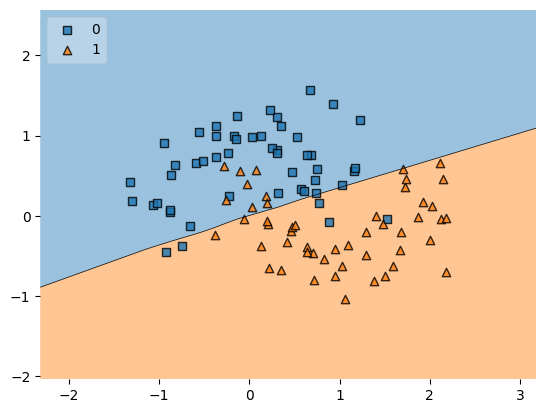

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

little better then rest cases

In [18]:
(np.random.randn(10,10)*0.01).min()

-0.02630747977162426

In [19]:
(np.random.randn(10,10)*0.01).max()

0.022888993196963543